In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# K-최근접 이웃 회귀

지도 알고리즘은 크게 분류와 **회귀**로 나뉜다. 
- 분류 : 샘플을 몇 개의 클래스 중 하나로 분류하는 문제
- 회귀 : 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제
    - 예 ) 내년도 경제 성장률 예측 / 배달이 도착할 시간 예측

우리에게 주어진 문제 : 농어의 무게를 예측

회귀 : 평균으로 회귀한다 
- 두 변수 사이의 상관관계를 분석하는 방법을 회귀라 불렀다. 

## 데이터 준비 
- https://bit.ly/perch_data

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

먼저 이 데이터가 어떤 형태를 띄고 있는지 산점도를 그려 보자. <br>
하나의 특성을 사용하기 때문에 데이터를 x축에 놓고 타깃 데이터를 y축에 놓는다.

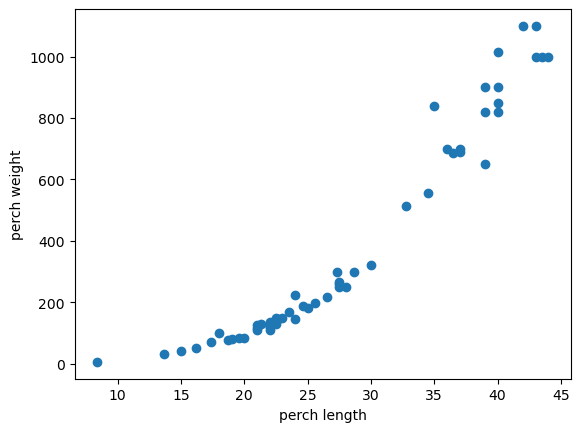

In [3]:
plt.scatter(perch_length, perch_weight)
plt.xlabel("perch length")
plt.ylabel("perch weight")
plt.show()

머신 러닝 모델에 사용하기 위해 훈련 세트와 테스트 세트로 나누자.

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
                perch_length, perch_weight, random_state = 42)

파이썬에서는 1차원 배열의 크기는 원소가 1개인 튜플로 나타낸다. 예를 들어 <br>
[1, 2, 3]의 크기는 (3, )이다. <br>

In [6]:
print(np.array([1, 2, 3]).shape)

(3,)


사이킷런에 사용할 훈련 세트는 2차원배열이어야 한다. <br>
perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열이다. 

이런 1차원 배열을 1개의 열이 있는 2차원 배열로 바꿔야 한다.

다행해 넘파이 배열은 크기를 바꿀 수 있는 ```reshape()``` 함수를 제공한다.

In [7]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [9]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


지정한 크기가 원본의 배열 원소 개수와 다르면 에러가 발생한다. <br>
(42, ) 크기의 1차원 배열인 train_input을 (42, 1)의 크기로 변환하자. <br>

In [10]:
train_input = train_input.reshape(42, 1)
train_input.shape

(42, 1)

넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공하는데, <br>
***크기에 -1을 지정하면*** 나머지 원소 개수로 모두 채우라는 의미이다.

In [11]:
test_input = test_input.reshape(-1, 1)
test_input.shape

(14, 1)

이제 준비한 훈련 세트를 활용하여 k-최근접 이웃 알고리즘을 훈련시켜 보자.

## 결정 계수

사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 <br>
***KNeighborsRegressor***이다.

이 클래스의 사용법은 KNeighborsClassifier와 비슷하다. <br>
객체를 사용하고, fit 메서드를 통해 훈련한 다음, score 데이터를 통해 테스트 데이터로 모델 점수를 평가한다.

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [20]:
# k-최근접 이웃 모델을 훈련한다.
knr.fit(train_input, train_target)

KNeighborsRegressor()

이제 테스트 점수를 확인해 보자.

In [21]:
print(knr.score(test_input, test_target))

0.992809406101064


위의 점수는, 테스트 세트에 있는 샘플을 정확히 분류한 개수의 비율이다. = ***정확도*** <br>
간단히 말해 정답을 맞힌 개수의 비율이다. 회귀에서 정확한 숫자를 맞힌다는 것은 거의 불가능하다.

회귀의 경우에는 조금 다른 값으로 평가하는데 이 점수를 ***결정계수***라 한다. 또는 간단히 $R^2$라 한다.

이름이 조금 어렵지만 계산 방식은 간단하다. <br>
$ R^2-1 = (타깃-예측)^2의 합 / (타깃 - 평균)^2의 합 $

만약 타깃의 평균 정도를 예측하는 수준이라면 ( 즉 분자와 분모가 비슷해져 ) <br>
$R^2$는 0에 가까워지고, 예측이 타깃에 아주 가까워지면( 분자가 0에 가까워지기 때문에 ) 1에 가까운 값이 된다.

0.99면 아주 좋은 값이다. 하지만 정확도처럼 R^2가 직감적ㅇ로 얼마나 좋은지 이해하기 어렵다. <br>
대신 다른 값을 계산해 보자.

타깃과 예측한 값 사이의 차이를 구해 보면 어느 정도 예측이 벗어났는지 가늠하기 좋다. <br>
sklearn은 sklearn.metrics 패키지 아래 여러 가지 측정 도구를 제공한다. <br>
이 중에서 ***mean_absolute_error**는 타깃과 예측의 절댓값 오차를 평균하여 반환한다. 

In [23]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다. <br> 
지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했다.

## 과대적합과 과소적합

그런데 훈련 세트로 테스트를 적용하면 어떨까 ? 

In [24]:
knr.score(train_input, train_target)

0.9698823289099254

훈련 세트에서 점수가 좋았는데, 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련세트에 ***과대적합***되었다고 말한다. <br>
훈련 세트에서는 점수가 나빴는데, 테스트 세트의 점수가 높거나, 둘 다 매우 낮다면 ***과소적합***되었다고 말한다.

훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요하다. 

위의 경우에는 훈련 세트보다 테스트 세트의 점수가 높으니 과소적합이다. 이 문제를 어떻게 해결할까 ? 

모델을 좀 더 복잡하게 만들면 된다. 즉 훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아질 것이다. <br>
k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것이다. 

이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, <br>
이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것이다. <br>
사이킷런의 k-최근접 이웃 알고리즘의 기본 k값은 5이다. 이를 3으로 낮춰 보자. 

In [26]:
# 이웃의 개수를 3으로 설정 
knr.n_neighbors = 3

# 모델을 다시 훈련하고, 훈련 점수를 출력한다.
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

훈련 세트의 $R^2$ 점수가 높아졌다. 그럼 이제 테스트 세트의 점수를 확인해 보자.

In [27]:
knr.score(test_input, test_target)

0.9746459963987609

훈련 세트의 점수를 높이면서도 테스트 세트의 점수가 낮지 않다. 괜찮게 훈련한 결과가 도출